In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('_mpl-gallery')

In [2]:
data = pd.read_csv('forecasting_data.csv')

In [3]:
data

,Period,Sales
0,1,5384
1,2,8081
2,3,10282
3,4,9156
4,5,6118
5,6,9139
6,7,12460
7,8,10717
8,9,7825
9,10,9693


<function matplotlib.pyplot.show(close=None, block=None)>

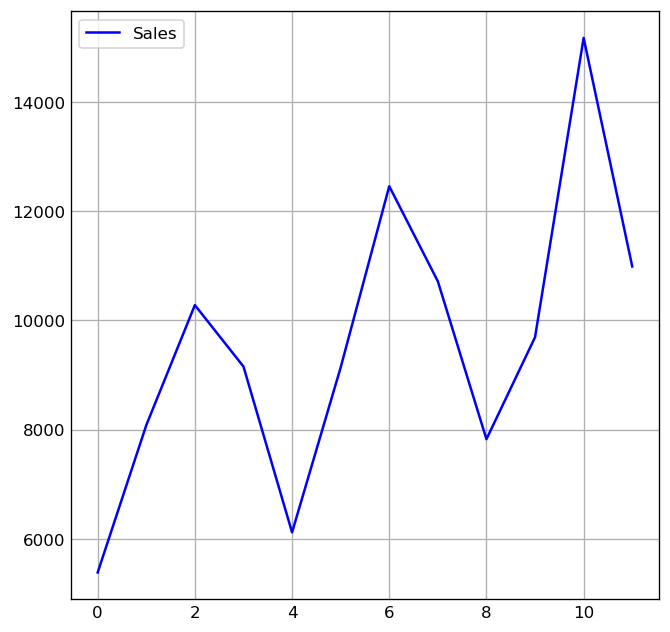

In [4]:
plt.figure(figsize=(5,5), dpi=120)
plt.plot(data['Sales'], color='blue', label='Sales')
plt.legend()
plt.show

Interpretation:

We can see that the sales rise and fall alternatively in every 2 months

Prediction using moving average

In [5]:
window_size=2

data['m_a'] = data['Sales'].rolling(window=window_size).mean()

In [6]:
forecast_13 = data['m_a'].iloc[-1]
forecast_14 = data['m_a'].iloc[-1]
forecast_15 = data['m_a'].iloc[-1]
forecast_16 = data['m_a'].iloc[-1]

In [7]:
print(forecast_13)
print(forecast_14)
print(forecast_15)
print(forecast_16)

13083.5
13083.5
13083.5
13083.5


FOR EXPONENTIAL SMOOTHING

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [9]:
ses = SimpleExpSmoothing(data['Sales'])

ses_fit = ses.fit()

forecast_sales = ses_fit.forecast(4)

In [10]:
forecast_sales

12    11542.408595
13    11542.408595
14    11542.408595
15    11542.408595
dtype: float64

Predict future demand in month 13,14,15,16 with seasonality

Dividing the dataset into 3 cycles

In [20]:
div = int(data.shape[0]/3)

In [21]:
div

4

In [22]:
cycle_1 = data.iloc[:1*div]

In [23]:
cycle_1

,Period,Sales,m_a
0,1,5384,NaN
1,2,8081,6732.5
2,3,10282,9181.5
3,4,9156,9719.0


In [25]:
cycle_2 = data.iloc[div:2*div]

In [26]:
cycle_2

,Period,Sales,m_a
4,5,6118,7637.0
5,6,9139,7628.5
6,7,12460,10799.5
7,8,10717,11588.5


In [27]:
cycle_3 = data.iloc[2*div:]

In [28]:
cycle_3

,Period,Sales,m_a
8,9,7825,9271.0
9,10,9693,8759.0
10,11,15177,12435.0
11,12,10990,13083.5


computing average sales for each cycle

In [30]:
avg_sales_cycle1 = cycle_1['Sales'].mean()
avg_sales_cycle2 = cycle_2['Sales'].mean()
avg_sales_cycle3 = cycle_3['Sales'].mean()

In [31]:
print(avg_sales_cycle1)
print(avg_sales_cycle2)
print(avg_sales_cycle3)

8225.75
9608.5
10921.25


Seasonal Indices for each cycle

In [32]:
cycle_1['seasonal_index'] = cycle_1['Sales'] / avg_sales_cycle1
cycle_2['seasonal_index'] = cycle_2['Sales'] / avg_sales_cycle2
cycle_3['seasonal_index'] = cycle_3['Sales'] / avg_sales_cycle3

C:\Users\dudes\AppData\Local\Temp\ipykernel_6864\2686443691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cycle_1['seasonal_index'] = cycle_1['Sales'] / avg_sales_cycle1
C:\Users\dudes\AppData\Local\Temp\ipykernel_6864\2686443691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cycle_2['seasonal_index'] = cycle_2['Sales'] / avg_sales_cycle2
C:\Users\dudes\AppData\Local\Temp\ipykernel_6864\2686443691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [33]:
cycle_1

,Period,Sales,m_a,seasonal_index
0,1,5384,NaN,0.654530
1,2,8081,6732.5,0.982403
2,3,10282,9181.5,1.249977
3,4,9156,9719.0,1.113090


In [118]:
next_cycle = (cycle_1['seasonal_index'] + cycle_2['seasonal_index'] + cycle_3['seasonal_index'])/3

In [119]:
from sklearn.linear_model import LinearRegression as LR

In [120]:
x =  [[1], [2], [3]]
y = [avg_sales_cycle1, avg_sales_cycle2, avg_sales_cycle3]

In [121]:
lr = LR()

In [122]:
lr.fit(x,y)

LinearRegression()

In [123]:
predict_sales = lr.predict(x)

In [124]:
predict_sales

array([ 8237.41666667,  9585.16666667, 10932.91666667])

Seasonally adjusted forecasts for next 4 months

In [125]:
forecast_demand = []

for i in range(13,17):
    month = i%12
    
    seasonal_index = next_cycle[month - 1]
    
    forecast_demand.append(predict_sales*seasonal_index)

In [126]:
forecast_demand

[array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan]),
 array([nan, nan, nan])]